# Basemaps

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

atl6 = pd.read_csv("dataframe20200702_deltatime")

In [5]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, GeoData, Marker, MarkerCluster, CircleMarker, WidgetControl

center = [65.73, -50.71]
zoom = 5

In [6]:
Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [7]:
from ipywidgets import Dropdown 

maps = Map(center=center, zoom=zoom)

ee_basemaps={}

for item in basemaps.values():
    try:
        name = item['name']
        basemap = 'basemaps.{}'.format(name)
        ee_basemaps[name] = basemap_to_tiles(eval(basemap))
    except:
        for sub_item in item:
            name = item[sub_item]['name']
            basemap = 'basemaps.{}'.format(name)
            basemap = basemap.replace('Mids', 'Modis')
            ee_basemaps[name] = basemap_to_tiles(eval(basemap))

dropdown = Dropdown(options=list(ee_basemaps.keys()), value='OpenStreetMap.Mapnik', description='Basemaps')

def on_click(change):
    basemap_name = change['new']
    old_basemap = maps.layers[-1]
    maps.substitute_layer(old_basemap, ee_basemaps[basemap_name])
    
dropdown.observe(on_click, 'value')

basemap_control = WidgetControl(widget=dropdown, position='topright')
maps.add_control(basemap_control)

maps

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [7]:
m1 = Map(center=center, zoom=zoom)
watercolor_layer = basemap_to_tiles(basemaps.NASAGIBS.ViirsTrueColorCR, '2019-06-01')
m1.add_layer(watercolor_layer)
m1

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

# Geodataframe
Using GeoData layer to visualize geodataframe on the map. [Example](https://ipyleaflet.readthedocs.io/en/latest/api_reference/geodata.html) with rivers and countries.

In [8]:
gdf = gpd.GeoDataFrame(atl6, geometry=gpd.points_from_xy(atl6.lon, atl6.lat))

In [9]:
gdf.head()

,Unnamed: 0,ground_track,t_year,lat,lon,Integer_Cloud_Mask,VIIRS_offset,h_li,s_li,q_flag,...,msw_flag,fbsnow_h,bsnow_od,layer_flag,bckgrd,e_bckgrd,n_fit_photons,segment_id,w_surface_window_final,geometry
0,0,gt1l,2019-06-01 20:04:48.205868,68.079999,-47.455941,NaN,NaN,1681.1671,0.008938,0,...,0,3.402824e+38,3.402824e+38,0,7417902.0,2635365.8,507,623016,3.0,POINT (-47.45594 68.08000)
1,1,gt1l,2019-06-01 20:04:48.208686,68.079821,-47.455997,NaN,NaN,1681.0332,0.012630,0,...,0,3.402824e+38,3.402824e+38,0,7494146.0,2635369.5,531,623017,3.0,POINT (-47.45600 68.07982)
2,2,gt1l,2019-06-01 20:04:48.211507,68.079643,-47.456053,NaN,NaN,1680.8826,0.011899,0,...,0,3.402824e+38,3.402824e+38,0,7561520.0,2635373.5,525,623018,3.0,POINT (-47.45605 68.07964)
3,3,gt1l,2019-06-01 20:04:48.214329,68.079464,-47.456110,NaN,NaN,1680.7661,0.011329,0,...,0,3.402824e+38,3.402824e+38,0,7556358.0,2635377.8,481,623019,3.0,POINT (-47.45611 68.07946)
4,4,gt1l,2019-06-01 20:04:48.217151,68.079286,-47.456168,NaN,NaN,1680.6771,0.011673,0,...,0,3.402824e+38,3.402824e+38,0,7567084.0,2635381.5,500,623020,3.0,POINT (-47.45617 68.07929)


In [10]:
geoMap = Map(center=center, zoom=zoom)
geoMap.add_layer(GeoData(geo_dataframe = gdf[:1000], point_style= {'radius': 5}))
geoMap

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

# Marker clusters?

Sampling 1000 rows from geodataframe and displaying marker for each location. Markers are clustered based on location.

In [6]:
clusterMap = Map(center=center, zoom=zoom)
clusterMap.add_layer(MarkerCluster(markers=[Marker(location=point.coords[0][::-1]) for point in gdf.sample(1000).geometry]))
clusterMap

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

Using circle marker instead of normal ones and considering only first 100 rows of the geodataframe.
Problem: I can see single points only when I zoom a lot and can see observe a few points in the map.

In [11]:
circleMap1 = Map(center=center, zoom=zoom)
circleMap1.add_layer(MarkerCluster(markers=[CircleMarker(radius=5, location=point.coords[0][::-1]) for point in gdf[:100].geometry]))
circleMap1

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

# Circle markers without clusters

Note: using for loop, is there something faster?

In [5]:
circleMap2 = Map(center=center, zoom=zoom)
for point in gdf[:1000].geometry:
    circleMap2.add_layer(CircleMarker(radius=5, location=point.coords[0][::-1]))
circleMap2

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

# Adding controls 

Control on scale and on full-screen.

In [19]:
from ipyleaflet import ScaleControl, FullScreenControl

geoMap.add_control(ScaleControl(position='bottomleft'))
geoMap.add_control(FullScreenControl())

In [12]:
#from ipyleaflet import MeasureControl
#circleMap2.add_control(MeasureControl(active_color = 'orange',primary_length_unit = 'kilometers'))

Control on zoom level using widget.

In [21]:
from ipyleaflet import WidgetControl
from ipywidgets import IntSlider, jslink

zoom_slider = IntSlider(description='Zoom level:', min=0, max=18, value=5)
jslink((zoom_slider, 'value'), (geoMap, 'zoom'))
geoMap.add_control(WidgetControl(widget=zoom_slider))

Other controls: [split-map](https://ipyleaflet.readthedocs.io/en/latest/api_reference/split_map_control.html), draw, legend, search.

# Adding color and popup

In [49]:
from ipywidgets import HTML
import matplotlib.colors as colors
import matplotlib.cm as cm

a = Map(center=center, zoom = zoom)

minima = gdf[:100]['h_li'].min()
maxima = gdf[:100]['h_li'].max()
norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.inferno)

for n in range(100):
    location=gdf.iloc[n].geometry.coords[0][::-1]
    i1 = gdf.iloc[n].n_fit_photons
    i2 = gdf.iloc[n].h_li
    marker = CircleMarker(location=location, radius = 5, color=colors.to_hex(mapper.to_rgba(i2)), 
                          fill_color=colors.to_hex(mapper.to_rgba(i2)))
    message = 'The number of photons is '+ str(i1)
    marker.popup = HTML(value= message)
    a.add_layer(marker)    
a

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

Problem: can't add legend that maps colors into `h_li`.

Define `marker_popup` function that adds layer where marker color and popup message are determined by choice of two features.

In [11]:
from ipywidgets import HTML
import matplotlib.colors as colors
import matplotlib.cm as cm


def marker_popup(basemap, data, popup_feat, color_feat, n_rows = 100):
    minima = data[:n_rows][color_feat].min()
    maxima = data[:n_rows][color_feat].max()
    norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.inferno)

    for n in range(n_rows):
        location=data.iloc[n].geometry.coords[0][::-1]
        i1 = gdf.iloc[n][popup_feat]
        i2 = gdf.iloc[n][color_feat]
        marker = CircleMarker(location=location, radius = 5, color=colors.to_hex(mapper.to_rgba(i2)), fill_color=colors.to_hex(mapper.to_rgba(i2)))
        message = 'The value for '+ popup_feat + ' is ' + str(i1)
        marker.popup = HTML(value= message)
        basemap.add_layer(marker)  
    return(basemap)

In [12]:
b = Map(center=center, zoom = zoom)
marker_popup(b, gdf, 'n_fit_photons', 'h_li')

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

Use ipywidgets to control `popup_feat` and `color_feat`.

In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

features = ['h_li', 's_li', 'q_flag', 's_fg', 'snr', 'h_rb', 'dh_fit_dx', 'bsnow_conf', 'cloud_flg_asr', 'cloud_flg_atm', 'msw_flag', 'fbsnow_h', 
            'bsnow_od', 'layer_flag', 'bckgrd', 'e_bckgrd', 'n_fit_photons', 'segment_id', 'w_surface_window_final','Integer_Cloud_Mask', 'VIIRS_offset']

interact(marker_popup, basemap = fixed(b), data = fixed(gdf), popup_feat = features, color_feat= features, n_rows=fixed(100))

interactive(children=(Dropdown(description='popup_feat', options=('h_li', 's_li', 'q_flag', 's_fg', 'snr', 'h_…

<function __main__.marker_popup(basemap, data, popup_feat, color_feat, n_rows=100)>

### Different solution: using GeoJSON and Choropleth

In [5]:
#gdf[:100].to_file("atl6_100.json", driver="GeoJSON")

In [14]:
import json

with open('atl6_100.json') as f:
    gj = json.load(f)

for feature in gj['features']:
     properties = feature['properties']
     feature.update(id=properties['Unnamed: 0'])

In [15]:
from ipyleaflet import Choropleth
import matplotlib.cm as cm

color_dict =  dict(zip(gdf[:100]['Unnamed: 0'].tolist(), gdf[:100].h_li.tolist()))

layer = Choropleth(geo_data=gj, choro_data=color_dict, key_on='id', 
                   value_min=gdf[:100].h_li.min(), value_max=gdf[:100].h_li.max(), point_style= {'radius': 5})

In [16]:
chorMap = Map(center=center, zoom=zoom)
chorMap.add_layer(layer)
chorMap

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

Adding message that tells us values of specific ATL6 flags. It is updated hovering over different points.

Note: could add arbitrary number of flags!

In [17]:
from ipywidgets import Text, HTML
from ipyleaflet import WidgetControl, GeoJSON 

html = HTML('''Hover over a point''')
control = WidgetControl(widget=html, position='topright')
chorMap.add_control(control)

def update_html(feature, id, **kwargs):
    html.value = '''
        <h3>ATL6 flags</h3>
        <h4>Cloud flag (asr): {}</h4>
        <h4>Layer flag: {}</h4> 
        <h4>Photons fitted: {}</h4>
    '''.format(feature['properties']['cloud_flg_asr'],
               feature['properties']['layer_flag'],
               feature['properties']['n_fit_photons'])

layer.on_hover(update_html)

To do: create legend.

# ATL03 plotting

Load ATL03 data and create a dictionary where keys correspond to ATL06 rows and values are dataframes with height, lat, lon of the single photons.

In [18]:
from utils_atl03 import *

my_lat = 66.444
my_lon = -46.614
date_range = ['2019-06-08','2019-06-10']
w = 10000

window_lat = delta_lat(my_lat, my_lon, w)
window_lon = delta_lon(my_lat, my_lon, w)

atl6_2 = atl6 [ (atl6["lat"] < my_lat + window_lat) & (atl6["lon"] < my_lon + window_lon) &
                (atl6["lat"] > my_lat - window_lat) & (atl6["lon"] > my_lon - window_lon) ]

In [19]:
#pho = read_atl03(my_lat, my_lon, date_range, w)

In [20]:
def temporary_f(lat, lon, date_range, delta_m, path = "new_ATL03/177301998"):

    window_lat = delta_lat(lat, lon, delta_m)
    window_lon = delta_lon(lat, lon, delta_m)
    
    spatial_extent = [ lon - window_lon, lat - window_lat, lon + window_lon, lat + window_lat ]
    spatial_extent = [ float(x) for x in spatial_extent ]
    
    flist = file_in_dir(path)
    assert len(flist) > 0, "There are not available granules for these parameters"
        
        
    dataframes = pd.DataFrame(columns = ["h_ph", "lon_ph", "lat_ph"])
    
    for file in flist:
        
        fname = path + "/" + file 
        
        with h5py.File(fname, 'r') as fi: 
            
            for my_gt in filter(fi.keys(), ["gt"]):
    
                lat_ph = fi[my_gt]['heights']["lat_ph"][:]
                lon_ph = fi[my_gt]['heights']["lon_ph"][:]
                h_ph   = fi[my_gt]['heights']["h_ph"][:]

                
                df = pd.DataFrame.from_dict({"h_ph": h_ph,
                                             "lon_ph": lon_ph,
                                             "lat_ph": lat_ph} )
    
                df = df [ (df["lat_ph"] < lat + window_lat) & (df["lon_ph"] < lon + window_lon) &
                          (df["lat_ph"] > lat - window_lat) & (df["lon_ph"] > lon - window_lon) ]
        
                dataframes = dataframes.append(df, ignore_index=True)
    
    return dataframes

In [21]:
pho = temporary_f(my_lat, my_lon, date_range, w)

In [22]:
atl3_2 = {}
atl6_2["atl3_std"] = None
atl6_2["n_photons"] = None
 
window_lat = delta_lat(my_lat, my_lon, 50)
window_lon = delta_lon(my_lat, my_lon, 50)   

for j, i in enumerate(atl6_2.index):
            
    my_row = atl6_2.loc[i]
    
    lat = float(my_row.lat)
    lon = float(my_row.lon)
    
    df = pho [ (pho["lat_ph"] < lat + window_lat) & (pho["lon_ph"] < lon + window_lon) &
               (pho["lat_ph"] > lat - window_lat) & (pho["lon_ph"] > lon - window_lon) ]
    
    atl3_2[i] = df
    
    atl6_2.loc[i, "atl3_std"] = np.std(df.h_ph)
    atl6_2.loc[i, "n_photons"] = df.shape[0]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Example of ATL03 scatter plot corresponding to a single ATL06 row.

(66.35406692675662, 66.35455237845844, 2040.2826293945313, 2102.0252319335937)

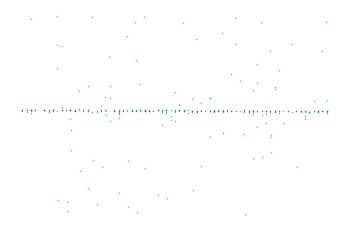

In [90]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
s, = ax.plot(atl3_2[atl6_2.index[0]].lat_ph, atl3_2[atl6_2.index[0]].h_ph, 'o', markersize=.3)
plt.axis('off')

Function that updates the plot given a different row index.

In [28]:
def update_points(s, ind):
    s.set_xdata(atl3_2[ind].lat_ph)
    s.set_ydata(atl3_2[ind].h_ph)
    ax.set_xlim([min(atl3_2[ind].lat_ph),max(atl3_2[ind].lat_ph)])
    ax.set_ylim([min(atl3_2[ind].h_ph),max(atl3_2[ind].h_ph)])
    fig.canvas.draw()
    fig.canvas.flush_events()

 Create a map with GeoJSON layer.

In [81]:
gdf2 = gpd.GeoDataFrame(atl6_2, geometry=gpd.points_from_xy(atl6_2.lon, atl6_2.lat))

In [86]:
gdf2=gdf2.drop(columns=['n_photons','atl3_std'])

In [92]:
#gdf2.to_file("atl6_2.json", driver="GeoJSON")

In [98]:
import json

with open('atl6_2.json') as f:
    gj2 = json.load(f)
    
for feature in gj2['features']:
     properties = feature['properties']
     feature.update(id=properties['Unnamed: 0'])

In [106]:
m_atl3 = Map(center=center, zoom=zoom)
geo = GeoJSON(data=gj2, point_style= {'radius': 5})
m_atl3.add_layer(geo)
m_atl3

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

Attempt to add a widget control for the scatter plot. Seems that WidgetControl doesn't accept a Matplotlib figure.

In [30]:
from ipyleaflet import WidgetControl

widget_control = WidgetControl(widget=fig, position='bottomright')
m_atl3.add_control(widget_control)

def on_hover(event, feature, **kwargs):
    global ind

    ind = feature['properties']['Unnamed: 0']
    update_points(s, ind)

m_atl3.on_hover(on_hover)

TraitError: The 'widget' trait of a WidgetControl instance must be a DOMWidget, but a value of class 'matplotlib.figure.Figure' (i.e. <Figure size 432x288 with 1 Axes>) was specified.

Trying with `bqplot` but there are problems in loading it.

In [28]:
from bqplot import Scatter, Figure, LinearScale, Axis

x_scale = LinearScale()
y_scale = LinearScale()

scatter = Scatter(x=atl3_2[atl6_2.index[0]].lat_ph.values, y=atl3_2[atl6_2.index[0]].h_ph.values, 
                  scales={'x': x_scale, 'y': y_scale})

ax_x = Axis(scale=x_scale)
ax_y = Axis(scale=y_scale)

figure = Figure(axes=[ax_x, ax_y], title='ATL03 heights', marks=[scatter])
figure

Figure(axes=[Axis(scale=LinearScale()), Axis(scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left…

# Ideas for next steps

* Solve the plotting issue with ATL03. 
* Use two different layers for ATL06 and VIIRS: the first similar to what we have seen so far and the second similar to [this](https://ipyleaflet.readthedocs.io/en/latest/api_reference/wms_layer.html). Also adding a widget that allows the user to choose whether to show both or one of the layers.
* Add an option that allows to select an area of interest and get some statistics out of it, possibly also past data.

### Other cool options

* [Velocity](https://ipyleaflet.readthedocs.io/en/latest/api_reference/velocity.html) layer: capturing wind velocity 
* [Split map](https://ipyleaflet.readthedocs.io/en/latest/api_reference/split_map_control.html) control. Could split by cloud mask type (e.g. VIIRS vs ATL06)?

In [8]:
#Lines

In [4]:
#lat_lon = (atl6.loc[:,['lat', 'lon']].values).tolist()

In [14]:
#from ipyleaflet import Map, Polyline
#
#lines = Polyline(locations=lat_lon, fill=False, weight=5)
#
#n = Map(center = center, zoom = zoom)
#n.add_layer(lines)
#n

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [ ]:
# Multiple polygons

In [ ]:
#tups = atl6.loc[:,['lat', 'lon']].apply(tuple, axis=1).values
#tups = tups.tolist()

In [27]:
#def extractDigits(lst): 
    #return list(map(lambda el:[el], lst))

In [29]:
#points = extractDigits(tups)

In [ ]:
#from ipyleaflet import Map, Polygon
#
#polygon = Polygon(
#    locations= points,
#    stroke=True,
#    opacity=0.8,
#    weight=2,
#    fill=True
#)
#
#m = Map(center=center, zoom=5)
#m.add_layer(polygon);
#
#m

In [ ]:
#Trying to pass list for color but doesn't work.

In [47]:
#lst=[]
#for i in gdf[:100].h_li:
#    lst.append(colors.to_hex(mapper.to_rgba(i)))

In [37]:
#import matplotlib.colors as colors
#import matplotlib.cm as cm
#
#a1 = Map(center=center, zoom=zoom)
#
#minima = gdf[:100]['h_li'].min()
#maxima = gdf[:100]['h_li'].max()
#norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
#    
#a1.add_layer(GeoData(geo_dataframe = gdf[:100], point_style= {'radius': 5, 
#                                                               'color' : lst}))
#a1

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [ ]:
#Trying with heatmap

In [106]:
#from numpy import interp
#atl6_temp = atl6[:100].copy()
#atl6_temp['h_li_norm'] = interp(atl6[:100].h_li, [atl6[:100].h_li.min(), atl6[:100].h_li.max()], [0,1000])

In [107]:
#lat_lon_h = (atl6_temp.loc[:,['lat', 'lon','h_li_norm']].values).tolist()

In [112]:
#from ipyleaflet import Heatmap
#
#heatMap = Map(center=center, zoom=zoom)
#
#heat = Heatmap(locations=lat_lon_h, radius=5, blur=5, gradient={0.4: 'blue', 0.6: 'cyan', 0.7: 'lime', 0.8: 'yellow', 1.0: 'red'})
#heatMap.add_layer(heat)
#
#heatMap

Map(center=[65.73, -50.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…